In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lasio

In [2]:
import glob
import os

# get all paths and alphabetically ordered
paths = sorted(glob.glob(os.path.join("C:/Users/ALEXANDER/Documents/SPE PAPER/sonic log/well_logs", "*.LAS")))

well_df = [0,0,0,0,0]

for i in range(len(paths)):
  # read with lasio
  well = lasio.read(paths[i])

  df = well.df()
  well_df[i] = df.reset_index()

well1, well2, well3, well4, well5 = well_df

In [3]:
well2.columns

Index(['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI',
       'DRHO', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM',
       'ROP', 'RPCEHM', 'RPCELM', 'RT'],
      dtype='object')

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_22880/231488634.py:37: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1.1)


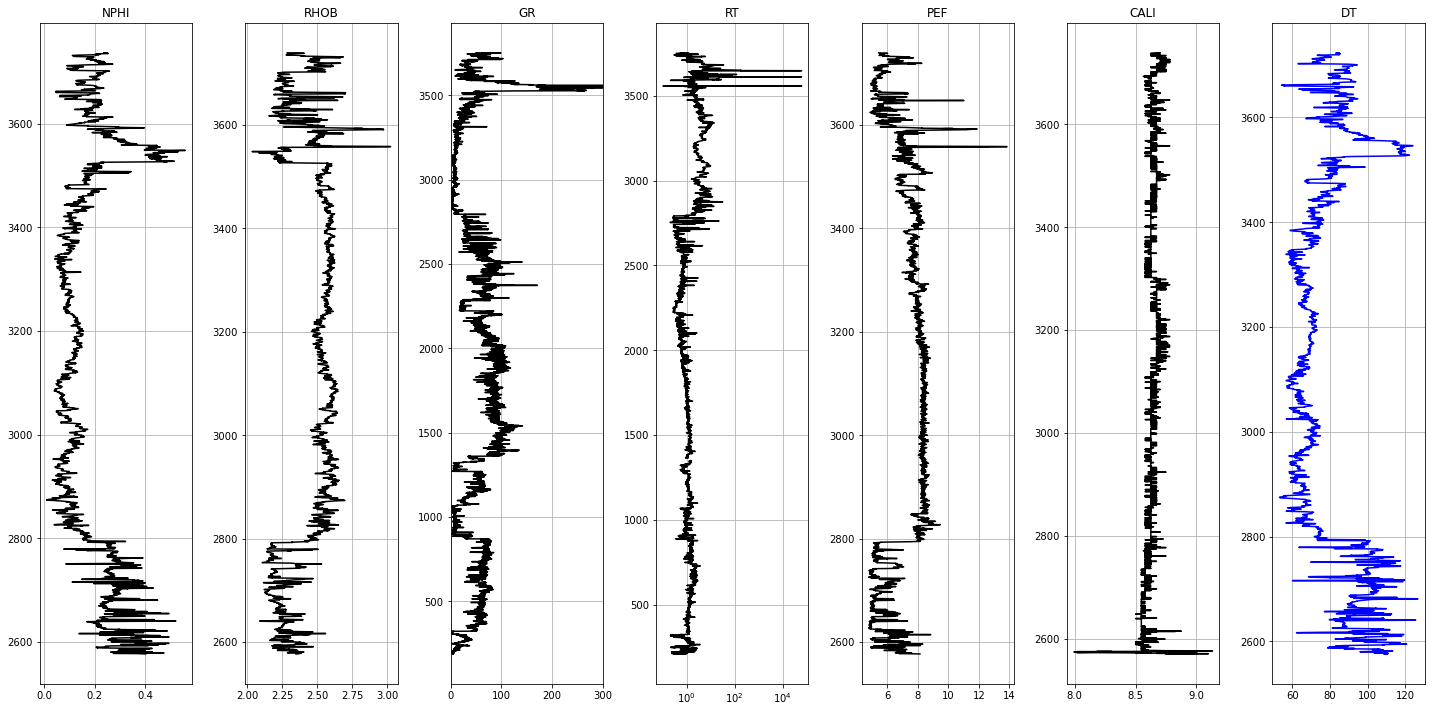

In [7]:
# Display train well data
def display_well_logs(well, without_DT= True):
    
    if without_DT == True:
        # define what logs are we going to use
        logs = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI']

        # create the subplots; ncols equals the number of logs
        fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(13,10))
        
        # looping each log to display in the subplots
        colors = ['black', 'red', 'blue', 'green', 'purple', 'black']
        dim=200
    else:

        logs = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

        # create the subplots; ncols equals the number of logs
        fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

#         my_suptitle = fig.suptitle("WELL 15_9-F-11A", size=20, y=1.05)
        colors = ['black', 'black', 'black', 'black', 'black', 'black', 'blue']
        dim=300

    for i in range(len(logs)):
      if i == 3:
        # for resistivity, semilog plot
        ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
      else:
        # for non-resistivity, normal plot
        ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])

      ax[i].set_title(logs[i])
      ax[i].grid(True)

    ax[2].set_xlim(0, dim)
    plt.tight_layout(1.1)
    
    
    plt.show()
display_well_logs(well1,without_DT=False)

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_22880/231488634.py:37: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1.1)


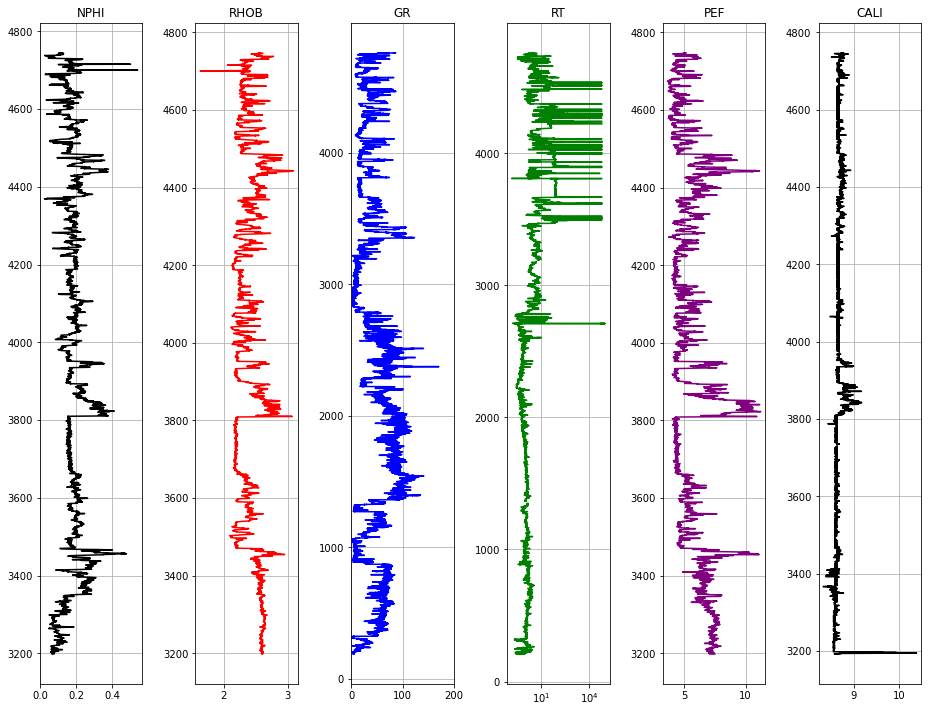

In [8]:
display_well_logs(well2)

## DATA PREPROCESSING

In order to remove NAN which occurs frequently in the data. We need to set a lower and upper limit of the depth.
These limits correspond to depth at which the features of interest are not null values.
For training:
* well1: 2,600-3,720 m
* well3: 2,620-3,640 m
* well4: 3,100-3,400 m

For prediction:
* well2: 3,200-4,740 m
* well5: 3,100-4,050 m


In [9]:
def prepare_log_data(well_data,test_wells,train_wells,lower_bound,upper_bound):
    train_cols = ['DEPTH', 'NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

    test_cols = ['DEPTH', 'NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI']

    place_holder = np.zeros(5).tolist()
    for well in range(len(well_data)):
        # restrict depth within the given lower and upper limit
        df = well_data[well].loc[(well_data[well]['DEPTH'] >= lower_bound[well]) & (well_data[well]['DEPTH'] <= upper_bound[well])]

        if well+1 in train_wells:
        # the train data, drop unwanted columns
            place_holder[well] = df[train_cols]

        else:
        # the test data, drop unwanted columns
            place_holder[well] = df[test_cols]
    well_1, well_2, well_3, well_4, well_5 = place_holder
    return well_1, well_2, well_3, well_4, well_5

      
    

In [10]:
lower_bound = [2600, 3200, 2620, 3100, 3100]
upper_bound = [3720, 4740, 3640, 3400, 4050]
train_wells,test_wells = [1,3,4],[2,5]
well_1, well_2, well_3, well_4, well_5 = prepare_log_data(well_df,test_wells,train_wells,lower_bound,upper_bound)

In [11]:
well_1.to_csv("wellx1.csv",index=False)
well_2.to_csv("wellx2.csv",index = False)
well_3.to_csv("wellx3.csv",index=False)
well_4.to_csv("wellx4.csv",index=False)
well_5.to_csv("wellx5.csv",index=False)

In [12]:
well_1

DEPTH   NPHI   RHOB      GR     RT    PEF   CALI       DT
24115  2600.0  0.371  2.356  82.748  1.323  7.126  8.648  104.605
24116  2600.1  0.341  2.338  79.399  1.196  6.654  8.578  103.827
24117  2600.2  0.308  2.315  74.248  1.171  6.105  8.578  102.740
24118  2600.3  0.283  2.291  68.542  1.142  5.613  8.547  100.943
24119  2600.4  0.272  2.269  60.314  1.107  5.281  8.523   98.473
...       ...    ...    ...     ...    ...    ...    ...      ...
35311  3719.6  0.236  2.617  70.191  1.627  7.438  8.703   84.800
35312  3719.7  0.238  2.595  75.393  1.513  7.258  8.750   85.013
35313  3719.8  0.236  2.571  82.648  1.420  7.076  8.766   85.054
35314  3719.9  0.217  2.544  89.157  1.349  6.956  8.781   84.928
35315  3720.0  0.226  2.520  90.898  1.301  6.920  8.781   84.784

[11201 rows x 8 columns]

In [13]:
import itertools
place_holder = [well_1, well_2, well_3, well_4, well_5]
well_names = ['15_9-F-11A', '15_9-F-11B', '15_9-F-1A', '15_9-F-1B', '15_9-F-1C']
    

In [14]:
def assign_well_names(place_holder,well_names):
    well_train = pd.concat([well_1, well_3, well_4])
    well_test = pd.concat([well_2, well_5])

    names_train = []
    names_test = []
    for well in range(len(place_holder)):
        if well+1 in train_wells: 
            _ = np.full(len(place_holder[well]), well_names[well])
            names_train.append(_)
        else:
            _ = np.full(len(place_holder[well]), well_names[well])
            names_test.append(_)

    names_train = list(itertools.chain.from_iterable(names_train))
    names_test = list(itertools.chain.from_iterable(names_test))

    well_train['WELL_ID'] = names_train
    well_test['WELL_ID'] = names_test

    depth_train, depth_test = well_train.pop('DEPTH'), well_test.pop('DEPTH')
    well_train['DEPTH'], well_test['DEPTH'] = depth_train, depth_test
    well_train.reset_index(drop=True,inplace=True)
    well_test.reset_index(drop=True,inplace=True)
    return well_train, well_test
well_train, well_test = assign_well_names(place_holder,well_names)

In [15]:
well_train

NPHI    RHOB       GR      RT     PEF    CALI        DT     WELL_ID  \
0      0.3710  2.3560  82.7480  1.3230  7.1260  8.6480  104.6050  15_9-F-11A   
1      0.3410  2.3380  79.3990  1.1960  6.6540  8.5780  103.8270  15_9-F-11A   
2      0.3080  2.3150  74.2480  1.1710  6.1050  8.5780  102.7400  15_9-F-11A   
3      0.2830  2.2910  68.5420  1.1420  5.6130  8.5470  100.9430  15_9-F-11A   
4      0.2720  2.2690  60.3140  1.1070  5.2810  8.5230   98.4730  15_9-F-11A   
...       ...     ...      ...     ...     ...     ...       ...         ...   
24398  0.1861  2.4571  60.4392  1.2337  5.9894  8.7227   75.3947   15_9-F-1B   
24399  0.1840  2.4596  61.8452  1.2452  6.0960  8.6976   75.3404   15_9-F-1B   
24400  0.1798  2.4637  61.1386  1.2960  6.1628  8.6976   75.3298   15_9-F-1B   
24401  0.1780  2.4714  59.3751  1.4060  6.1520  8.6976   75.3541   15_9-F-1B   
24402  0.1760  2.4809  58.3742  1.4529  6.1061  8.6978   75.4476   15_9-F-1B   

        DEPTH  
0      2600.0  
1      2600.1  
2      2600.2  
3      2600.3  
4      2600.4  
...       ...  
24398  3399.6  
24399  3399.7  
24400  3399.8  
24401  3399.9  
24402  3400.0  

[24403 rows x 9 columns]

In [16]:
well_test.to_csv("well_test.csv",index=False)

### EXPLORATORY DATA ANALYSIS

#### PAIRPLOT

In [17]:
sns.set(style="whitegrid")
#{darkgrid, whitegrid, dark, white, ticks}

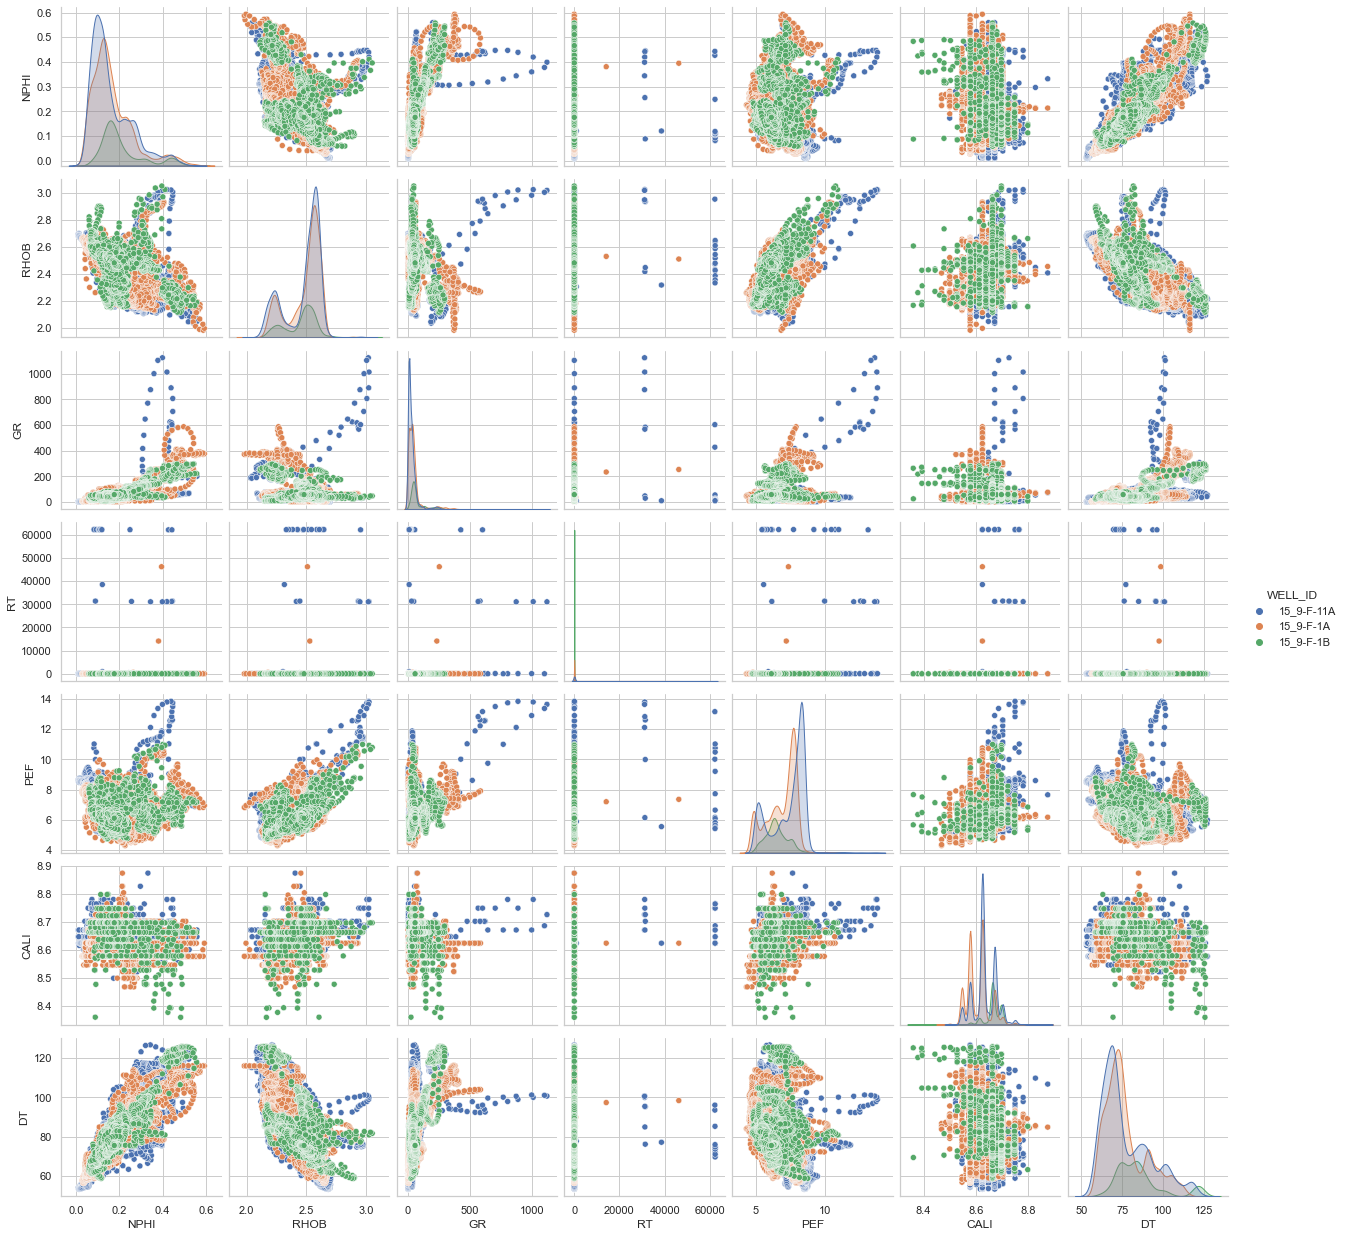

In [18]:
variables = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']
sns.pairplot(data= well_train,vars =variables, kind='scatter', diag_kind='kde',hue="WELL_ID")
plt.show()

### CORRELATION HEATMAP PLOT

<AxesSubplot:>

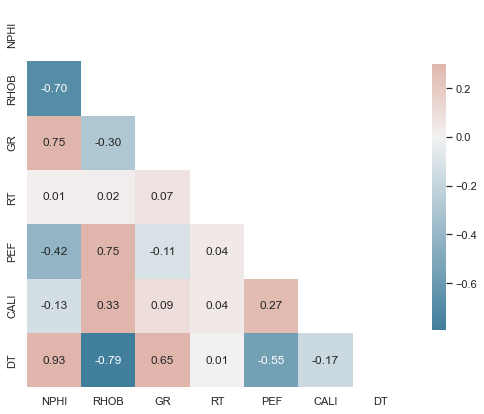

In [19]:
corr = well_train[variables].corr()
mask= np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(9,7))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,center=0,square=True,annot=True, fmt='.2f',vmax=.3,cbar_kws={'shrink':.7})

### DATA NORMALIZATION

Data will be normalize using the following means:
* Log transform the RT log
* Use power transform with Yeo-Johnson method

**We transform all variables in the data except 'WELL' and 'DEPTH'.**

In [20]:
well_train.columns

Index(['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT', 'WELL_ID', 'DEPTH'], dtype='object')

In [21]:
feature_to_transform = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI'] # features to be transformed
target = 'DT' # target
feature_target = np.append(feature_to_transform, target) # feature and target column names
features = well_train.columns

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

# Normalize the resistivity (RT) feature using logarithmic transforms
well_train['RT'] = np.log10(well_train['RT'])

# Normalize the rest of the features using power transform (Yeo-Johnson method)
scaler = PowerTransformer(method='yeo-johnson')

column_drop = ['WELL_ID', 'DEPTH']
Transformer = ColumnTransformer([('transform', scaler, feature_target)], remainder='passthrough')

well_train_norm = Transformer.fit_transform(well_train)
well_train_norm = pd.DataFrame(well_train_norm, columns=features)
well_train_norm

NPHI      RHOB        GR        RT       PEF      CALI        DT  \
0      1.702168 -0.920748   1.13065 -0.631876  0.031083  0.450019   1.58838   
1      1.573404 -1.020621  1.092435 -0.736154 -0.373325 -1.070848  1.562349   
2      1.407108 -1.142493  1.030314  -0.75808  -0.81989 -1.070848  1.525055   
3      1.260691 -1.263078  0.956135 -0.784153 -1.197992 -1.753641  1.460934   
4      1.189869 -1.367969  0.837247 -0.816586 -1.441155 -2.286221  1.367432   
...         ...       ...       ...       ...       ...       ...       ...   
24398  0.462363 -0.279351  0.839177 -0.704005 -0.910619  2.041708  0.047941   
24399  0.439808 -0.261621  0.860577 -0.694407 -0.826995  1.510434  0.043466   
24400  0.393869 -0.232335  0.849885  -0.65312 -0.774093  1.510434  0.042591   
24401  0.373838 -0.176628   0.82264 -0.569367 -0.782672  1.510434  0.044596   
24402  0.351335 -0.106609  0.806807 -0.535769 -0.819021  1.514682  0.052292   

          WELL_ID   DEPTH  
0      15_9-F-11A  2600.0  
1      15_9-F-11A  2600.1  
2      15_9-F-11A  2600.2  
3      15_9-F-11A  2600.3  
4      15_9-F-11A  2600.4  
...           ...     ...  
24398   15_9-F-1B  3399.6  
24399   15_9-F-1B  3399.7  
24400   15_9-F-1B  3399.8  
24401   15_9-F-1B  3399.9  
24402   15_9-F-1B  3400.0  

[24403 rows x 9 columns]

- Yeo-Johnson method is used to normalize the bulk density (RHOB), porosity (NPHI), radioactivity content (GR), and photoelectric absorption factor (PEF) of the formation.
- Whereas Resistivity (RT) is normalized using logarithmic transforms

- Change the datatype,  bulk density (RHOB), porosity (NPHI), radioactivity content (GR), photoelectric absorption factor (PEF) and Resistivity (RT) are expected to be numeric (continous).


In [23]:
df1 = well_train_norm[feature_target].astype(float)
df2 = well_train_norm['WELL_ID'].astype(str)
df3 = well_train_norm['DEPTH'].astype(float)

well_train_norm = pd.concat([df1,df2,df3], axis=1)

- To Observe the effect of Normalization, we make a pair-plot of the data after normalization

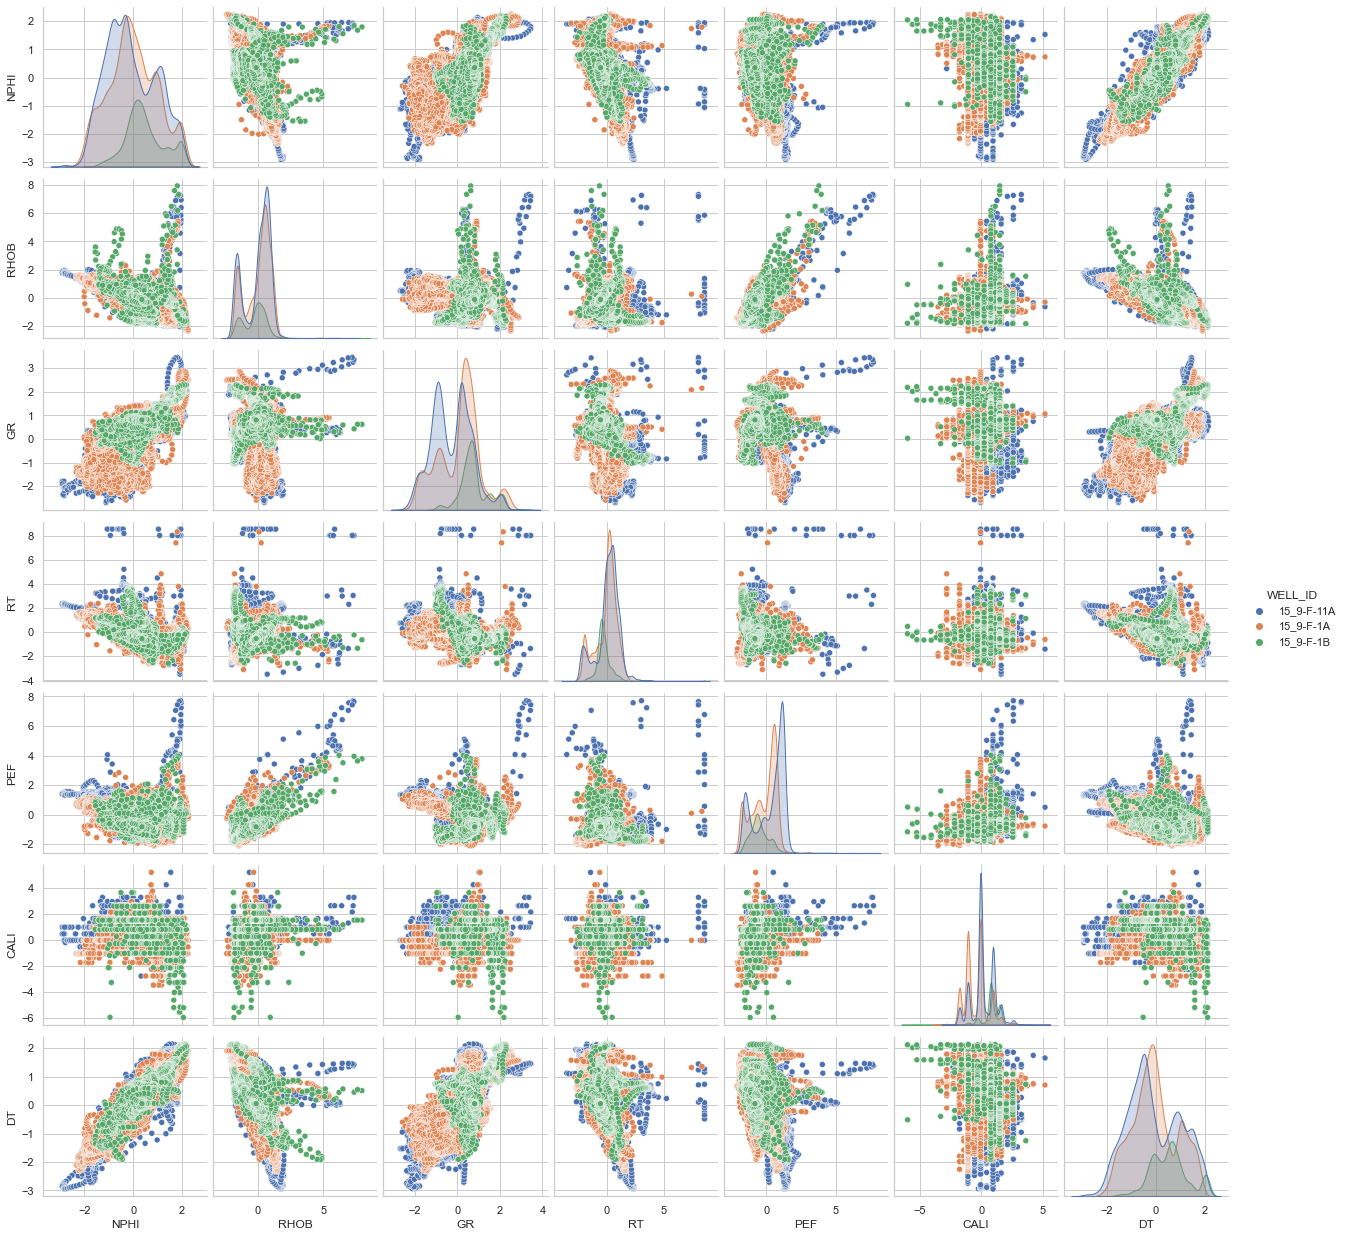

In [24]:
sns.pairplot(data= well_train_norm,vars =feature_target, kind='scatter', diag_kind='kde',hue="WELL_ID")
plt.show()

###  OUTLIER DETECTION AND REMOVAL

In [25]:
well_train_copy = well_train_norm.copy()
well_train_copy = well_train_copy.drop(['WELL_ID', 'DEPTH'], axis=1)

In [26]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

def Outlier_detection(data):
    # Standard Deviation 
    well_train_std = data[np.abs(data - data.mean()) <= (3 * data.std())]

    well_train_std = well_train_std.dropna()

    # Isolation Forest
    iso = IsolationForest(contamination=0.5)
    pred = iso.fit_predict(data)
    mask = pred != -1
    well_train_iso = well_train_norm[mask]

    # Minimum Covariance Determinant
    EE = EllipticEnvelope(contamination=0.1)
    pred = EE.fit_predict(data)
    mask = pred != -1
    well_train_ee = well_train_norm[mask]

    # Local Outlier Factor
    lof = LocalOutlierFactor(contamination=0.3)
    pred = lof.fit_predict(data)
    mask = pred != -1
    well_train_lof = well_train_norm[mask]

    # One-class SVM
    svm = OneClassSVM(nu=0.1)
    pred = svm.fit_predict(data)
    mask = pred != -1
    well_train_svm = well_train_norm[mask]
    print('Number of points before outliers removed                       :', len(well_train_norm))
    print('Number of points after outliers removed with Standard Deviation:', len(well_train_std))
    print('Number of points after outliers removed with Isolation Forest  :', len(well_train_iso))
    print('Number of points after outliers removed with Min. Covariance   :', len(well_train_ee))
    print('Number of points after outliers removed with Outlier Factor    :', len(well_train_lof))
    print('Number of points after outliers removed with One-class SVM     :', len(well_train_svm))
    return well_train_norm,well_train_std, well_train_iso,well_train_ee, well_train_lof, well_train_svm
well_train_norm,well_train_std, well_train_iso,well_train_ee, well_train_lof, well_train_svm =  Outlier_detection(well_train_copy)

Number of points before outliers removed                       : 24403
Number of points after outliers removed with Standard Deviation: 24101
Number of points after outliers removed with Isolation Forest  : 12202
Number of points after outliers removed with Min. Covariance   : 21962
Number of points after outliers removed with Outlier Factor    : 17082
Number of points after outliers removed with One-class SVM     : 21964


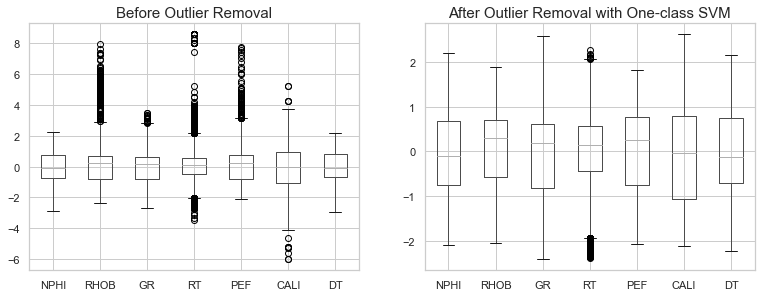

In [27]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
well_train_norm[feature_target].boxplot()
plt.title('Before Outlier Removal', size=15)
plt.subplot(2,2,2)
well_train_svm[feature_target].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)
plt.savefig("plot.png", format="png")

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_22880/2314869067.py:29: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1.7)


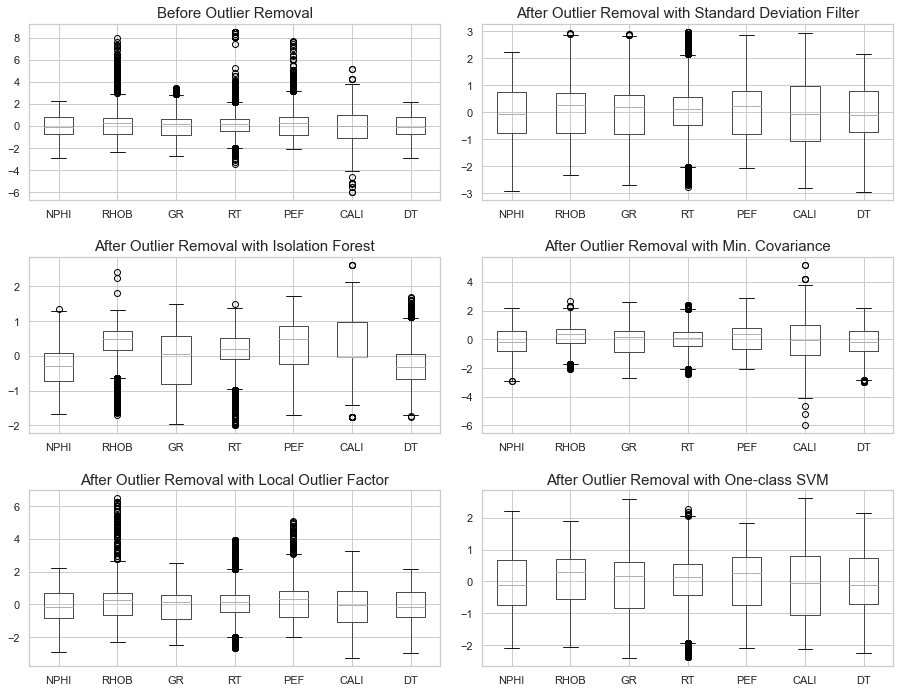

In [28]:
def display_outlier_analysis():
    plt.figure(figsize=(13,10))

    plt.subplot(3,2,1)
    well_train_norm[feature_target].boxplot()
    plt.title('Before Outlier Removal', size=15)

    plt.subplot(3,2,2)
    well_train_std[feature_target].boxplot()
    plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

    plt.subplot(3,2,3)
    well_train_iso[feature_target].boxplot()
    plt.title('After Outlier Removal with Isolation Forest', size=15)

    plt.subplot(3,2,4)
    well_train_ee[feature_target].boxplot()
    plt.title('After Outlier Removal with Min. Covariance', size=15)

    plt.subplot(3,2,5)
    well_train_lof[feature_target].boxplot()
    plt.title('After Outlier Removal with Local Outlier Factor', size=15)

    plt.subplot(3,2,6)
    well_train_svm[feature_target].boxplot()
    plt.title('After Outlier Removal with One-class SVM', size=15)
    

    plt.tight_layout(1.7)
    plt.show()
display_outlier_analysis()

- **One-class SVM** is the best method: as *most of the oultiers* are reomved after the application of One-class SVM .

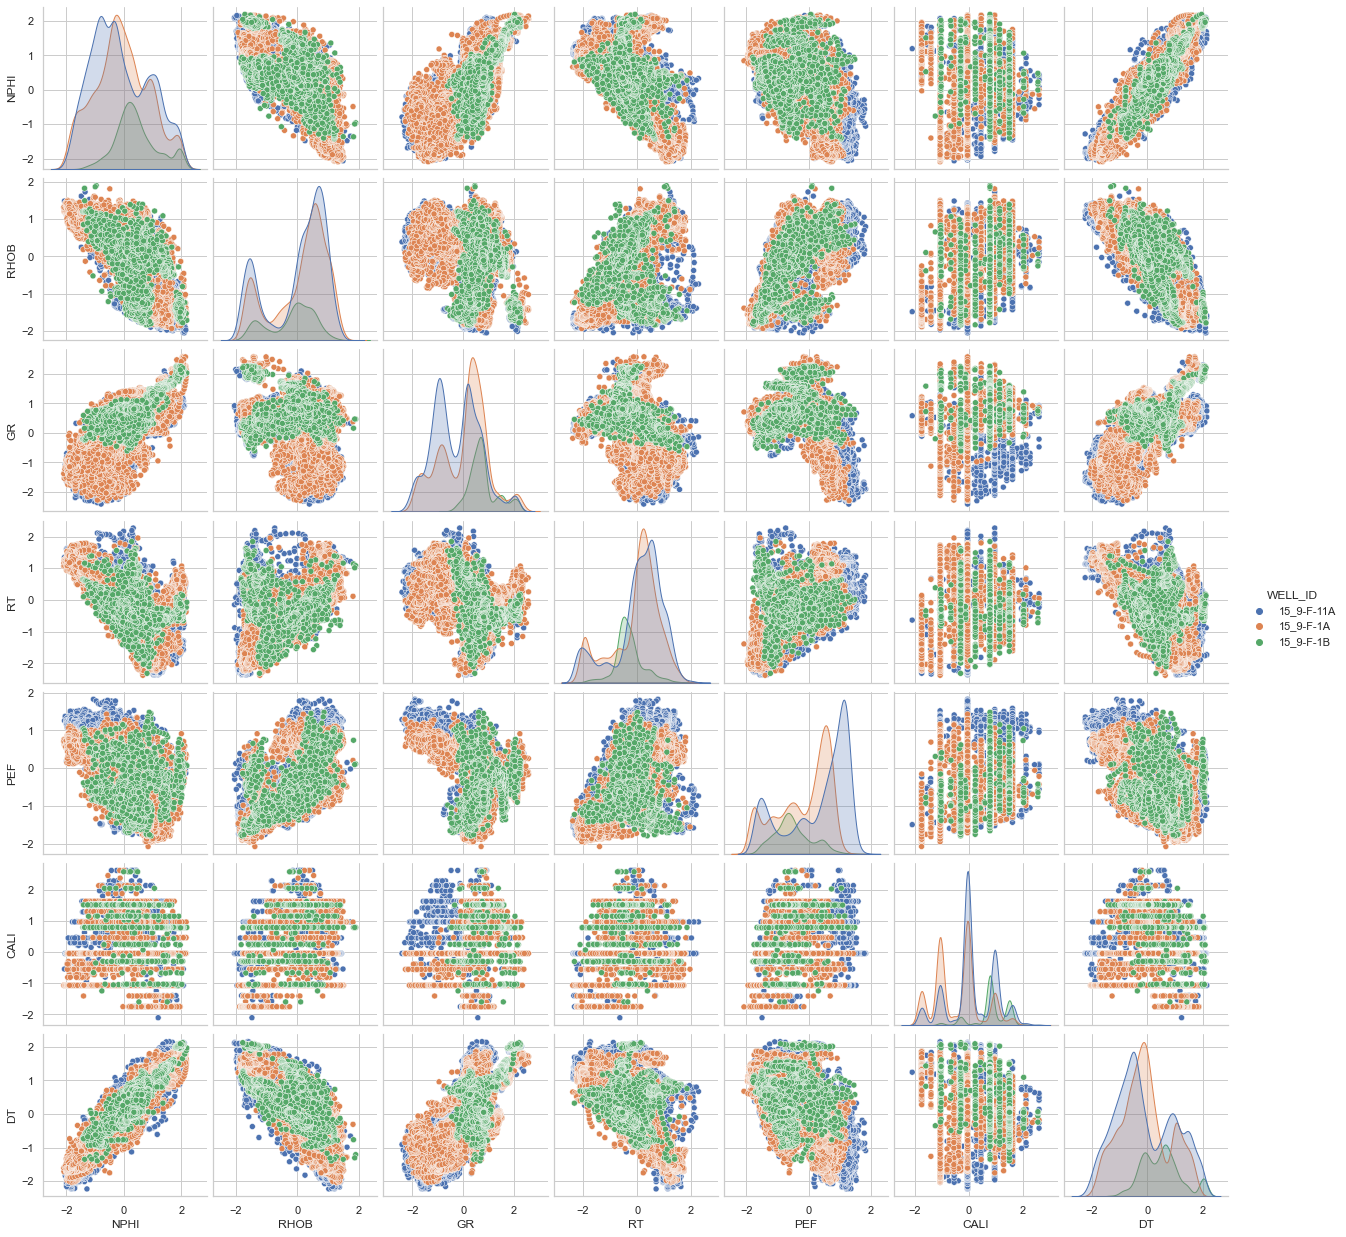

In [29]:
sns.pairplot(data= well_train_svm,vars =feature_target, kind='scatter', diag_kind='kde',hue="WELL_ID")
plt.savefig('grafic4.png')
plt.show()

- To Observe the effect of Outlier removal, we make a pair-plot of the data after the application of One-class SVM

In [30]:
well_train_svm.to_csv("well_train_svm.csv",index=False)
well_test.to_csv("well_test.csv",index=False)
well_train.to_csv("well_train.csv")
well_train_norm.to_csv("well_train_norm.csv",index=False)

In [31]:
pd.read_csv('well_train.csv')

Unnamed: 0    NPHI    RHOB       GR        RT     PEF    CALI  \
0               0  0.3710  2.3560  82.7480  0.121560  7.1260  8.6480   
1               1  0.3410  2.3380  79.3990  0.077731  6.6540  8.5780   
2               2  0.3080  2.3150  74.2480  0.068557  6.1050  8.5780   
3               3  0.2830  2.2910  68.5420  0.057666  5.6130  8.5470   
4               4  0.2720  2.2690  60.3140  0.044148  5.2810  8.5230   
...           ...     ...     ...      ...       ...     ...     ...   
24398       24398  0.1861  2.4571  60.4392  0.091210  5.9894  8.7227   
24399       24399  0.1840  2.4596  61.8452  0.095239  6.0960  8.6976   
24400       24400  0.1798  2.4637  61.1386  0.112605  6.1628  8.6976   
24401       24401  0.1780  2.4714  59.3751  0.147985  6.1520  8.6976   
24402       24402  0.1760  2.4809  58.3742  0.162236  6.1061  8.6978   

             DT     WELL_ID   DEPTH  
0      104.6050  15_9-F-11A  2600.0  
1      103.8270  15_9-F-11A  2600.1  
2      102.7400  15_9-F-11A  2600.2  
3      100.9430  15_9-F-11A  2600.3  
4       98.4730  15_9-F-11A  2600.4  
...         ...         ...     ...  
24398   75.3947   15_9-F-1B  3399.6  
24399   75.3404   15_9-F-1B  3399.7  
24400   75.3298   15_9-F-1B  3399.8  
24401   75.3541   15_9-F-1B  3399.9  
24402   75.4476   15_9-F-1B  3400.0  

[24403 rows x 10 columns]